# K-Sredina

## Ucitavanje paketa

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Preprecesiranje podataka

In [10]:
df = pd.read_csv('Data/dogs.csv')

feature_names = df.columns[1:]
target_name = df.columns[0]

X = df[feature_names]
y = df[target_name]

scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=feature_names)
X.head()

,height,weight
0,0.062238,-0.330507
1,-0.485456,-0.888111
2,-0.211609,-0.553549
3,1.020703,1.342305
4,-1.580845,-1.155761


## Algoritam klasterovanje

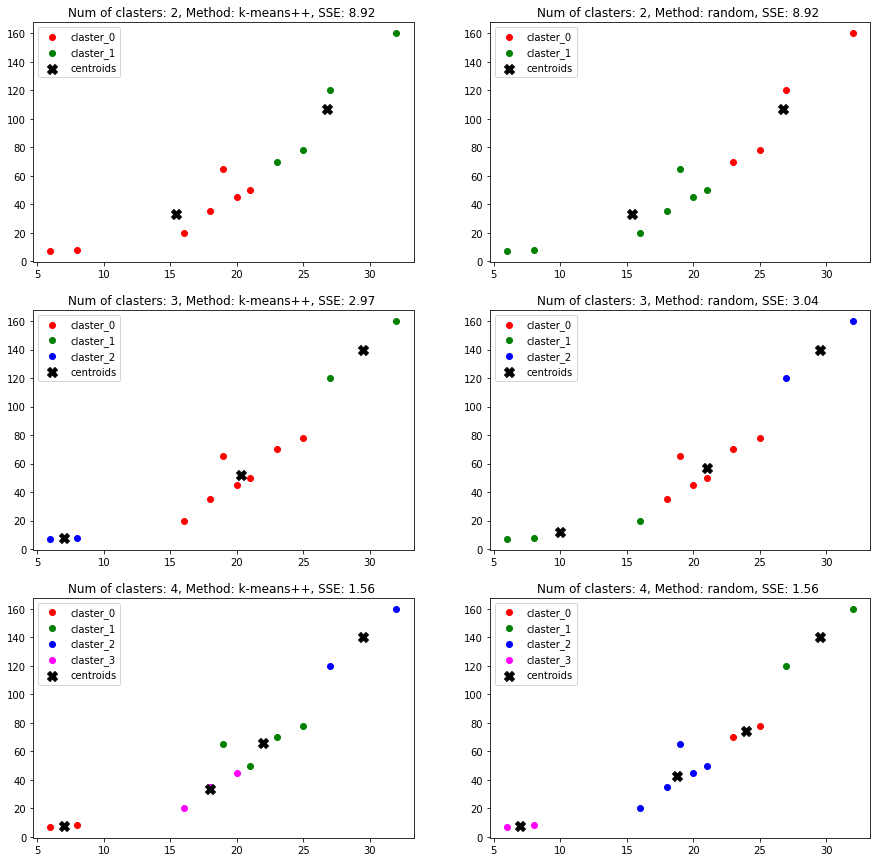

In [35]:
fig = plt.figure(figsize=(15, 15))
fig_i = 1

colors = ['red', 'green', 'blue', 'magenta', 'yellow', 'cyan']

for n_clasters in range(2, 5):
    
    for init_method in ['k-means++', 'random']:
        
        kmeans = KMeans(n_clasters, init=init_method)
        kmeans.fit(X)
        'k-means++', 'random'
        df['labels'] = kmeans.labels_
        
        fig.add_subplot(3, 2, fig_i)
        plt.title(
            f'Num of clasters: {n_clasters}, ' +
            f'Method: {init_method}, ' +
            f'SSE: {round(kmeans.inertia_, 2)} '
        )
        
        for claster_i in range(n_clasters):
            claster = df.loc[df['labels'] == claster_i]
            
            plt.scatter(
                claster['height'], claster['weight'], 
                label=f'claster_{claster_i}', color=colors[claster_i]
            )
        
        centroids = pd.DataFrame(
            scaler.inverse_transform(kmeans.cluster_centers_), 
            columns=feature_names
        )
        
        plt.scatter(
            centroids['height'], centroids['weight'],
            color='black', label='centroids', marker='X', s=100
        )
        
        plt.legend()
        fig_i += 1

plt.show()        

  Na osnovu $SSE$ mere imamo da je najbolje klasterovanje sa $4$ klastera. Dok sa graficke strane vidimo da je
  to ili klasterovanje sa $3$ klastera metodom `'k-means++'` ili klasterovanje sa $4$ klastera metodom `'random'`.